In [3]:
pip install d2l

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.7 MB/s eta 0:00:00
  Using cached jupyter-1.0.0-py2.py3-none-any.whl (2.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 95.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
      Successfully uninstalled scipy-1.11.4
  Attempting uninstall: pyparsing
    Found existing insta

In [16]:
!pip install d2l==1.0.0b0

%matplotlib inline
import time
import torch
import pandas
import torchvision
import torchvision.transforms as transforms
from d2l import torch as d2l

d2l.use_svg_display()


  Using cached d2l-1.0.0b0-py3-none-any.whl (141 kB)
  Using cached gym-0.21.0.tar.gz (1.5 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
class FashionMNIST(d2l.DataModule):

    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize),
                                    transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(
            root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(
            root=self.root, train=False, transform=trans, download=True)

In [3]:
data = FashionMNIST(resize=(32, 32))
 #The images are grayscale and upscaled to  32x32 pixels in resolution above
len(data.train), len(data.val)

100%|██████████| 26421880/26421880 [00:02<00:00, 9852199.93it/s] 


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 174717.04it/s]


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3241913.74it/s]


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18129535.68it/s]


Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



(60000, 10000)

In [4]:
#store an image as a cxhxw tensor, where c is the number of color channels, h is the height and w is the width.
data.train[0][0].shape


torch.Size([1, 32, 32])

In [5]:
#The following convenience method converts between numeric labels and their names.

@d2l.add_to_class(FashionMNIST)

def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [6]:
#To make our life easier when reading from the training and test sets, we use the built-in data iterator rather than creating one from scratch.

In [7]:

@d2l.add_to_class(FashionMNIST)

def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train,
                                       num_workers=self.num_workers)

In [8]:
#To see how this works, let’s load a minibatch of images by invoking the train_dataloader method. It contains 64 images.

In [9]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


**visualization**

In [ ]:
#the function show_images can be used to visualize the images and the associated labels.

In [10]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images."""
    raise NotImplementedError

In [11]:
#Here are the images and their corresponding labels (in text) for the first few examples in the training dataset.

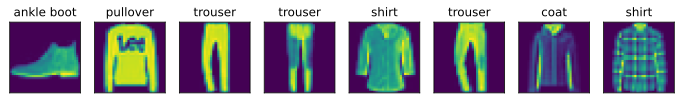

In [12]:
@d2l.add_to_class(FashionMNIST)
def visualize(self, batch, nrows=1, ncols=8, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [ ]:
#We define the Classifier class below. In the validation_step we report both the
#loss value and the classification accuracy on a validation batch. We draw an update
# for every num_val_batches batches. This has the benefit of generating the averaged
 # loss and accuracy on the whole validation data. These average numbers are not exactly
#  correct if the final batch contains fewer examples, but we ignore this minor
#difference to keep the code simple.

In [13]:
class Classifier(d2l.Module):
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)



In [ ]:
#By default we use a stochastic gradient descent optimizer, operating on minibatches, just as we did in the context of linear regression.

In [14]:
@d2l.add_to_class(d2l.Module)
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

We use argmax to obtain the predicted class by the index for the largest entry in each row. Then we compare the predicted class with the ground truth y elementwise. Since the equality operator == is sensitive to data types, we convert y_hat’s data type to match that of y. The result is a tensor containing entries of 0 (false) and 1 (true). Taking the sum yields the number of correct predictions.

In [15]:
@d2l.add_to_class(Classifier)
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

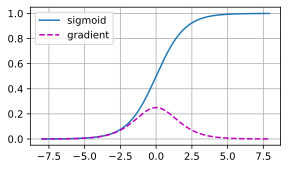

In [17]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))